In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

In [9]:
def foo(eps, N):
    # max will be eps*(2**N)
    
    x = cvx.Variable(N+1)
    y = cvx.Variable(N+1)

    cst = [
        0 <= x[0],
        x[0] <= eps,
        y[0] >= x[0]*eps,
    ]
    
    for i in range(N):
        delta = eps*(2**i)
        
        cst += [
            x[i] >= cvx.abs(x[i+1] - delta),
            y[i] <= y[i+1] - 2*delta*x[i+1] + delta**2,
        ]
        
    return x[N], y[N], cst, eps*(2**N)

In [48]:
def bar(N=3):
    x, x_sq, cst1, max_out = foo(.5**N, N)
    y, y_sq, cst2, max_out = foo(.5**N, N)

    cst = cst1 + cst2
    cst += [
        x_sq + y_sq <= 1
    ]

    obj = cvx.Maximize(np.random.rand()*x + np.random.rand()*y)

    cvx.Problem(obj, cst).solve()

    return x.value, y.value

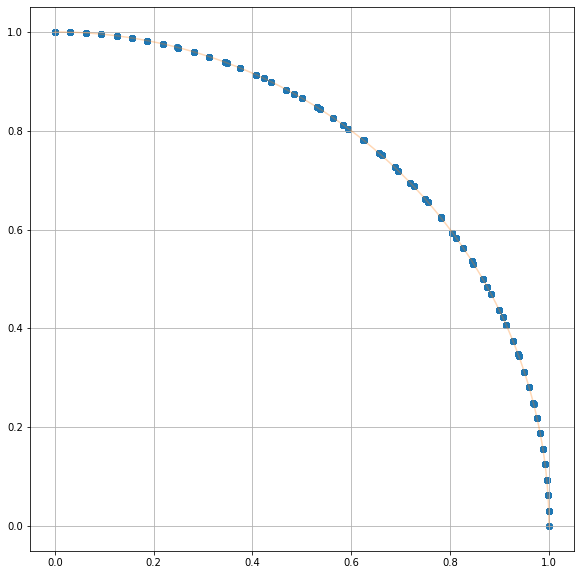

In [59]:
x,y = zip(*[bar(5) for _ in range(1000)])

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x,y)
ax.grid()
ax.set_aspect('equal')

xstar = np.linspace(0,1, 1000)
ystar = np.sqrt(1 - xstar**2)

ax.plot(xstar,ystar, color='C1', alpha=.3)

In [4]:
eps = .1
N = 3

x = np.linspace(0, eps*(2**N), 100)
y = [foo(a, eps, N).solve() for a in x]

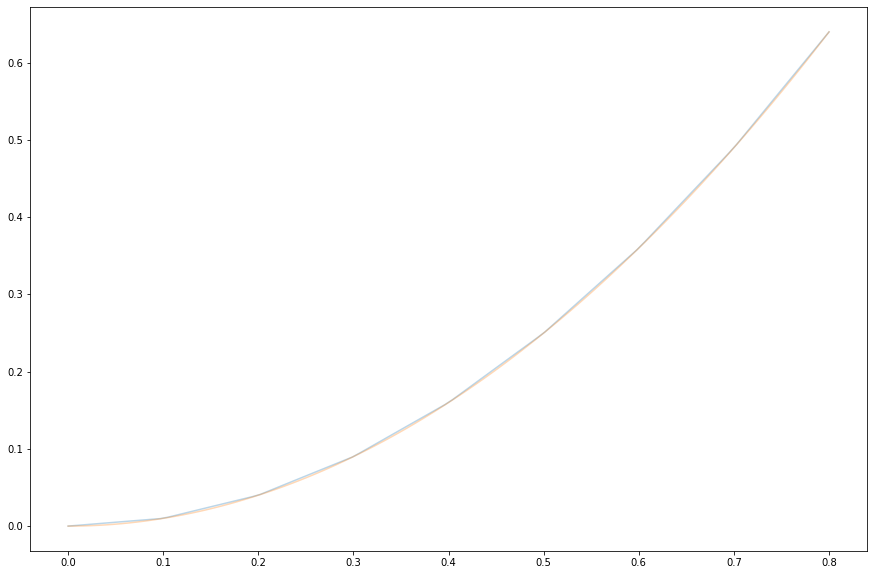

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x,y, alpha=.3)
ax.plot(x, x**2, alpha=.3)
fig.savefig('test.png', dpi=300)